# Capstone Project: Improving NLTK's Lemmatization Process

Submitted by Shannon Bingham
February 2019


## Executive Summary
The Natural Language Toolkit (NLTK) is a widely used open source solution for computer processing and analysis of human language.  The toolkit includes many useful utilities including an interface to the WordNet lexical reference database.  When I used the toolkit's stemming and lemmatizing programs for a Natural Language Processing (NLP) classification project at General Assembly, I grew very curious about first, the data that was being created, and second, the logic going on under the hood.  My questions led me to wonder about how I could improve the quality of my input data, especially given that the sheer number of features in an NLP project makes it quite challenging to understand what the data looks like.

For my capstone project, I decided to improve the NLTK interface to WordNet.  My work on this project led to many interesting insights about electronic dictionaries as well as about language processing in general.  Over the course of  project, I became more deeply interested in NLP, an area in data science that is growing rapidly.  The changes that I made to the toolkit built a foundation that provides greater control over the lemmatization process and, thus, more opportunity to improve data.  The changes will be available for implementation anywhere.

## Notebook Description
This notebook includes all the code I used to visualize the time data collected during testing.  Please note the Setup cell that drives the variables substitutions.

## Set up environment.

In [1]:
# Import libraries.
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Increase number of columns that can be viewed in notebook.
pd.set_option('display.max_columns', 500)

# Set random seed for reproducibility.
random.seed(42)

In [2]:
# Specify the number of reviews of each type (pos and neg) being sampled.
n = 50

# Set file location for input files
dev_csv    = (f'./data/lemmas_dev_s{n*2}_time.csv')
prod_csv   = (f'./data/lemmas_prod_s{n*2}_time.csv')
# Locate the file.

# Print messages.
print(f'** The dev  time data will be loaded from "{dev_csv}". **')
print()
print(f'** The prod time data will be loaded from "{dev_csv}". **')

** The dev  time data will be loaded from "./data/lemmas_dev_s100_time.csv". **

** The prod time data will be loaded from "./data/lemmas_dev_s100_time.csv". **


In [3]:
# Load the data.
dev = pd.read_csv(dev_csv)
prod = pd.read_csv(prod_csv)

# Take a look. 
print(dev.shape)
print(prod.shape)

(100, 2)
(100, 2)


# Evaluate time data.

In [4]:
# Calculate the cumulative sums for the lemmas and the elapsed time fields.

# Rewrite the lemma count in thousands so that cumsum can do the calculation.
dev['lemma count']  =  dev['lemma count'] / 1000
prod['lemma count'] =  prod['lemma count'] / 1000

# Cumsum on rows.
dev  = dev.cumsum()
prod = prod.cumsum()

# Take a look.
dev.head()

,lemma count,elapsed_time
0,0.123,1.551483
1,0.173,1.552179
2,0.319,1.552951
3,0.461,1.553856
4,0.557,1.554659


In [5]:
# Take a look.
prod.head()

,lemma count,elapsed_time
0,0.123,1.659729
1,0.173,1.660389
2,0.319,1.661368
3,0.461,1.662303
4,0.557,1.663042


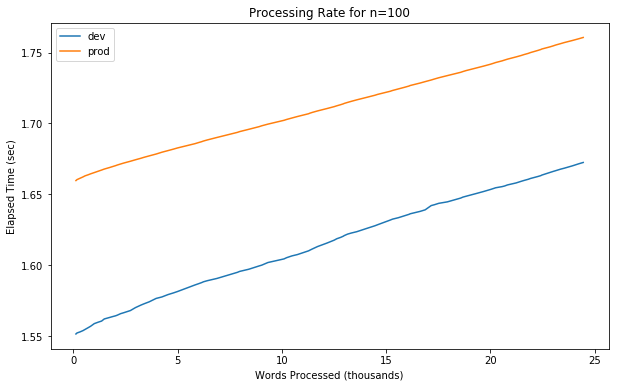

In [6]:
# Plot the elapsed time information.

# Set figure size.
plt.figure(figsize=(10,6))


plt.plot(dev['lemma count'], dev['elapsed_time'])
plt.plot(prod['lemma count'], prod['elapsed_time'])

plt.legend(['dev', 'prod'], loc='upper left')
plt.xlabel('Words Processed (thousands)')

plt.ylabel('Elapsed Time (sec)')
plt.title('Processing Rate for n=100')

plt.show()